In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('ai_job_dataset.csv')
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [79]:
df.shape

(15000, 19)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [81]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [82]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])
df['required_skills'] = df['required_skills'].str.split(', ')
df['posting_month'] = df['posting_date'].dt.to_period('M')

In [83]:
df.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,posting_month
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"[Tableau, PyTorch, Kubernetes, Linux, NLP]",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2024-10
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"[Deep Learning, AWS, Mathematics, Python, Docker]",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,2024-11
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"[Kubernetes, Deep Learning, Java, Hadoop, NLP]",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,2025-03
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"[Scala, SQL, Linux, Python]",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,2024-12
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"[MLOps, Java, Tableau, Python]",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,2025-04
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"[Data Visualization, R, SQL, Linux]",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co,2024-08
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"[R, Docker, MLOps]",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd,2024-12
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"[Python, SQL, Computer Vision, Java, Azure]",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions,2024-06
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"[Hadoop, Git, Mathematics, Python]",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc,2024-11
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"[MLOps, GCP, Scala, Azure, Linux]",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions,2024-10


# Average Salary by Experience Level

In [84]:
avg_salary_exp = df.groupby('experience_level')['salary_usd'].mean().round(2)
avg_salary_exp

,salary_usd
experience_level,
EN,63133.38
EX,187723.65
MI,87955.47
SE,122187.66


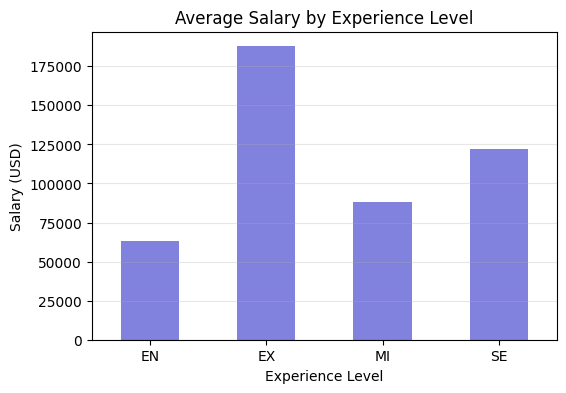

In [85]:
plt.figure(figsize=(6,4))
avg_salary_exp.plot(kind='bar', color='#8181DE')
plt.title('Average Salary by Experience Level')
plt.ylabel('Salary (USD)')
plt.xlabel('Experience Level')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Top 5 Job Titles by Salary

In [86]:
top_titles = df.groupby('job_title')['salary_usd'].mean().nlargest(5).round(2)
top_titles

,salary_usd
job_title,
AI Specialist,120570.76
Machine Learning Engineer,118827.92
Head of AI,118542.97
AI Research Scientist,117897.93
AI Architect,117436.51


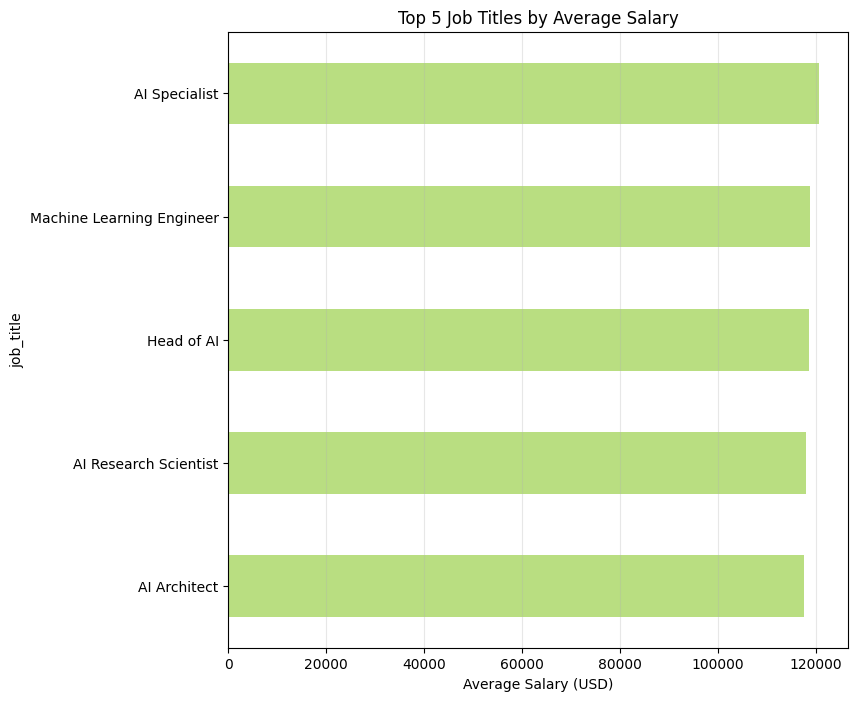

In [87]:
plt.figure(figsize=(8,8))
top_titles.sort_values().plot(kind='barh', color='#B9DE81')
plt.title('Top 5 Job Titles by Average Salary')
plt.xlabel('Average Salary (USD)')
plt.grid(axis='x', alpha=0.3)
plt.show()

In [88]:
salary_by_size = df.groupby('company_size')['salary_usd'].mean().round(2)
salary_by_size

,salary_usd
company_size,
L,130322.45
M,113600.24
S,102146.93


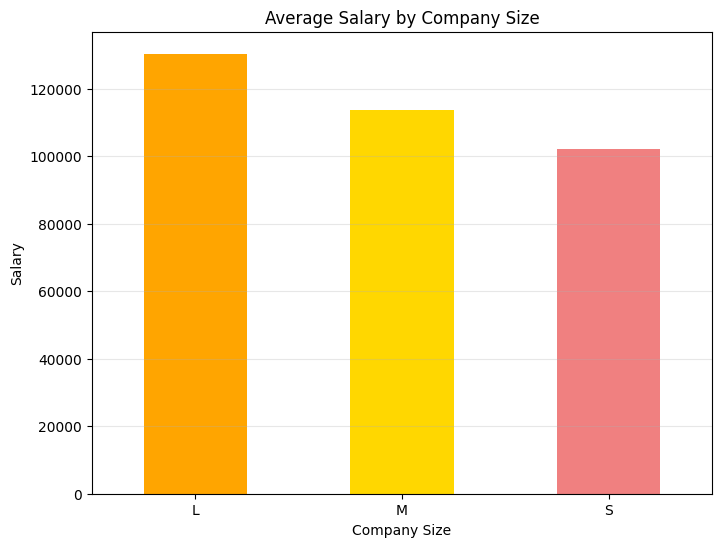

In [89]:
plt.figure(figsize=(8,6))
salary_by_size.plot(kind='bar', color=['orange', 'gold', 'lightcoral'])
plt.title('Average Salary by Company Size')
plt.ylabel('Salary')
plt.xlabel('Company Size')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Correlation between experience and salary

In [90]:
correlation = df['years_experience'].corr(df['salary_usd'])
print(f"Correlation: {correlation:.3f}")

Correlation: 0.738


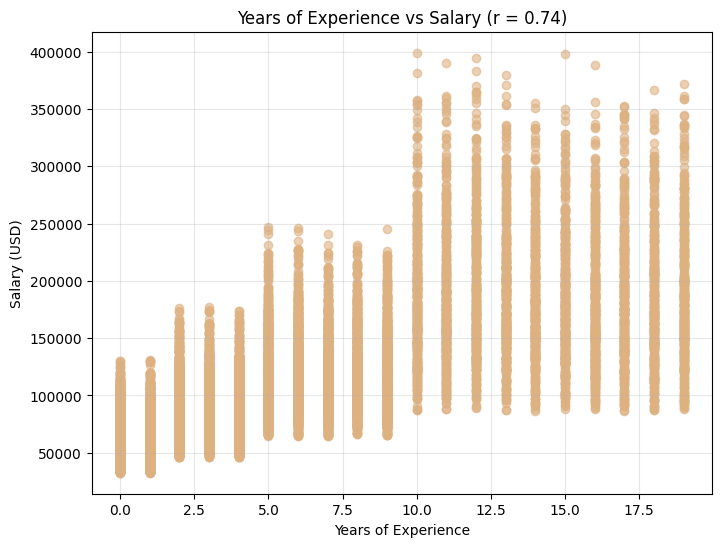

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(df['years_experience'], df['salary_usd'], color='#DEB181', alpha=0.6)
plt.title(f'Years of Experience vs Salary (r = {correlation:.2f})')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.grid(alpha=0.3)
plt.show()

# Remote Work Distribution

In [92]:
remote_dist = df['remote_ratio'].value_counts(normalize=True) * 100
remote_dist = remote_dist.round(2)
remote_dist

,proportion
remote_ratio,
0,33.83
50,33.37
100,32.80


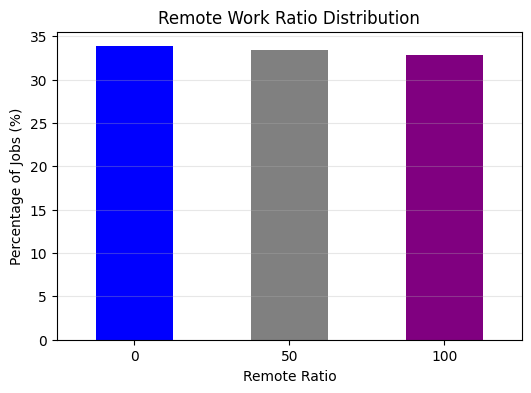

In [93]:
plt.figure(figsize=(6,4))
remote_dist.plot(kind='bar', color=['blue', 'grey', 'purple'])
plt.title('Remote Work Ratio Distribution')
plt.ylabel('Percentage of Jobs (%)')
plt.xlabel('Remote Ratio')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Top 10 Industries by Job Count

In [94]:
top_industries = df['industry'].value_counts().head(10)
top_industries

,count
industry,
Retail,1063
Media,1045
Automotive,1020
Consulting,1020
Technology,1011
Real Estate,1007
Government,998
Transportation,997
Telecommunications,997


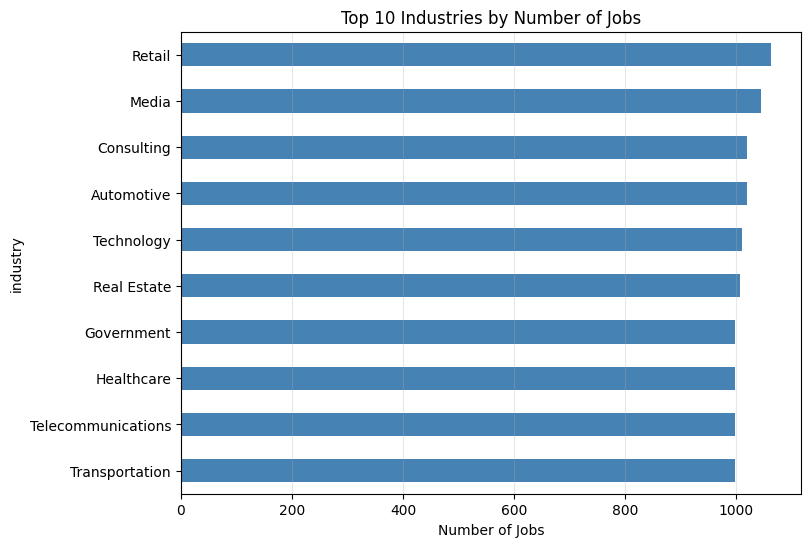

In [95]:
plt.figure(figsize=(8,6))
top_industries.sort_values().plot(kind='barh', color='steelblue')
plt.title('Top 10 Industries by Number of Jobs')
plt.xlabel('Number of Jobs')
plt.grid(axis='x', alpha=0.3)
plt.show()

# Average Salary by Education Level

In [96]:
salary_edu = df.groupby('education_required')['salary_usd'].mean().round(2)
salary_edu

,salary_usd
education_required,
Associate,114605.71
Bachelor,115861.63
Master,117171.82
PhD,113728.17


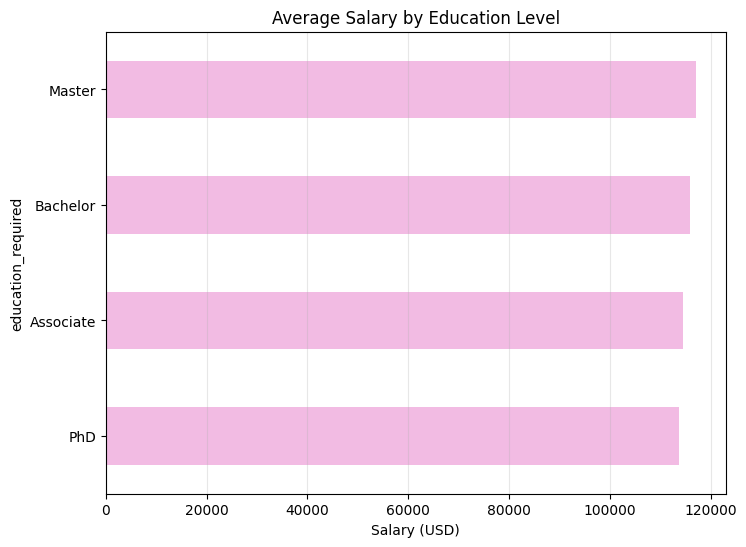

In [97]:
plt.figure(figsize=(8,6))
salary_edu.sort_values().plot(kind='barh', color='#F2BBE3')
plt.title('Average Salary by Education Level')
plt.xlabel('Salary (USD)')
plt.grid(axis='x', alpha=0.3)
plt.show()

# Job Posting Trends by Month

In [98]:
monthly_posts = df['posting_month'].value_counts().sort_index()
monthly_posts

,count
posting_month,
2024-01,953
2024-02,927
2024-03,932
2024-04,985
2024-05,955
2024-06,938
2024-07,959
2024-08,958
2024-09,895


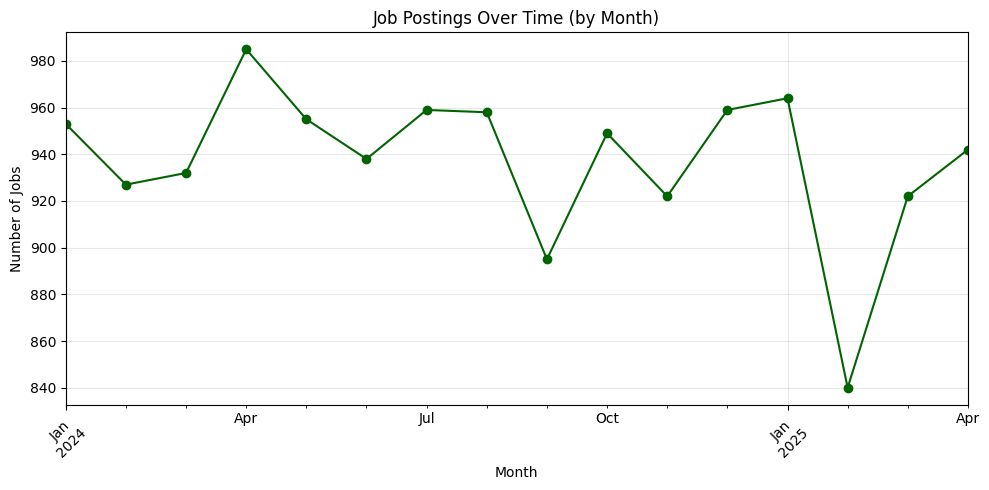

In [99]:
plt.figure(figsize=(10,5))
monthly_posts.plot(kind='line', marker='o', color='darkgreen')
plt.title('Job Postings Over Time (by Month)')
plt.ylabel('Number of Jobs')
plt.xlabel('Month')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()